In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install folium contextily geopandas shapely

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import folium
from folium.plugins import HeatMap

import geopandas as gpd
import contextily as ctx
from shapely import wkt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv("/content/drive/MyDrive/praktikum_ml/praktikum11/data/dataset_covid19.csv")
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [5]:
df.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,31822.000000,3.182200e+04,31822.000000,0.0,31822.000000,...,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,29883.000000,28375.000000
mean,402.311388,9.920652,390.398498,1.992238,1.594500e+05,4564.753221,1.492615e+05,5623.782415,NaN,24.027277,...,738.894928,113.700478,-2.725681,28.133292,11485.038800,0.640308,289.633640,28.963329,1.326795,1.033834
std,2320.629838,64.139080,2199.878802,1219.513355,6.264435e+05,17693.731369,5.958536e+05,28537.412305,NaN,68.359734,...,2729.431626,9.862068,3.608065,74.309710,16477.385479,1.933016,363.428724,36.342881,2.679379,1.351755
min,0.000000,0.000000,0.000000,-29938.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,NaN,1.000000,...,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,-12.000000,5.223250e+03,128.000000,3.913500e+03,80.000000,NaN,7.000000,...,47.790000,106.109004,-6.204699,0.830000,1291.367500,0.000000,38.862500,3.890000,0.650000,0.750000
50%,27.000000,0.000000,20.000000,0.000000,2.359650e+04,565.500000,2.102750e+04,557.000000,NaN,11.000000,...,103.840000,113.417654,-2.461746,5.710000,6804.285000,0.000000,158.415000,15.840000,1.000000,1.000000
75%,130.000000,3.000000,123.000000,19.000000,6.992775e+04,2189.000000,6.414200e+04,2279.000000,NaN,18.000000,...,262.700000,121.201093,0.212037,22.290000,14557.360000,0.540000,389.910000,38.990000,1.310000,1.000000
max,64718.000000,2069.000000,61361.000000,39165.000000,6.405044e+06,157876.000000,6.218708e+06,586113.000000,NaN,416.000000,...,16334.310000,138.696030,4.225615,1459.040000,130231.620000,63.800000,1632.600000,163.260000,175.000000,134.500000


In [6]:
df.isnull().sum()

,0
Date,0
Location ISO Code,0
Location,0
New Cases,0
New Deaths,0
New Recovered,0
New Active Cases,0
Total Cases,0
Total Deaths,0
Total Recovered,0


In [7]:
# Buat peta dasar Indonesia
peta_indonesia = folium.Map(location=[-2.5, 118.0], zoom_start=5)

# Buat list data [lat, long, value] untuk heatmap
data_heatmap = df[['Latitude', 'Longitude', 'Total Deaths' ]].values.tolist()

# Tambahkan heatmap ke peta
HeatMap(data_heatmap, radius=12, blur=15, max_zoom=6).add_to(peta_indonesia)

# Tampilkan peta
peta_indonesia

In [8]:
#1
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec

# Jitter koordinat agar tidak tumpang tindih
np.random.seed(42)
long_peta = df['Longitude'] + np.random.uniform(-0.05, 0.05, size=len(df))
lat_peta = df['Latitude'] + np.random.uniform(-0.05, 0.05, size=len(df))

# Konversi ke GeoDataFrame
df = gpd.GeoDataFrame(
      df,
      geometry=gpd.points_from_xy(long_peta, lat_peta),
      crs='EPSG:4326'
)
# Proyeksi ke Web Mercator
df = df.to_crs(epsg=3857)

persentaseKematian = df.groupby("Location")["Total Deaths"].mean()
top_5 = persentaseKematian.sort_values(ascending=False).head(5)
bottom_5 = persentaseKematian.sort_values().head(5)

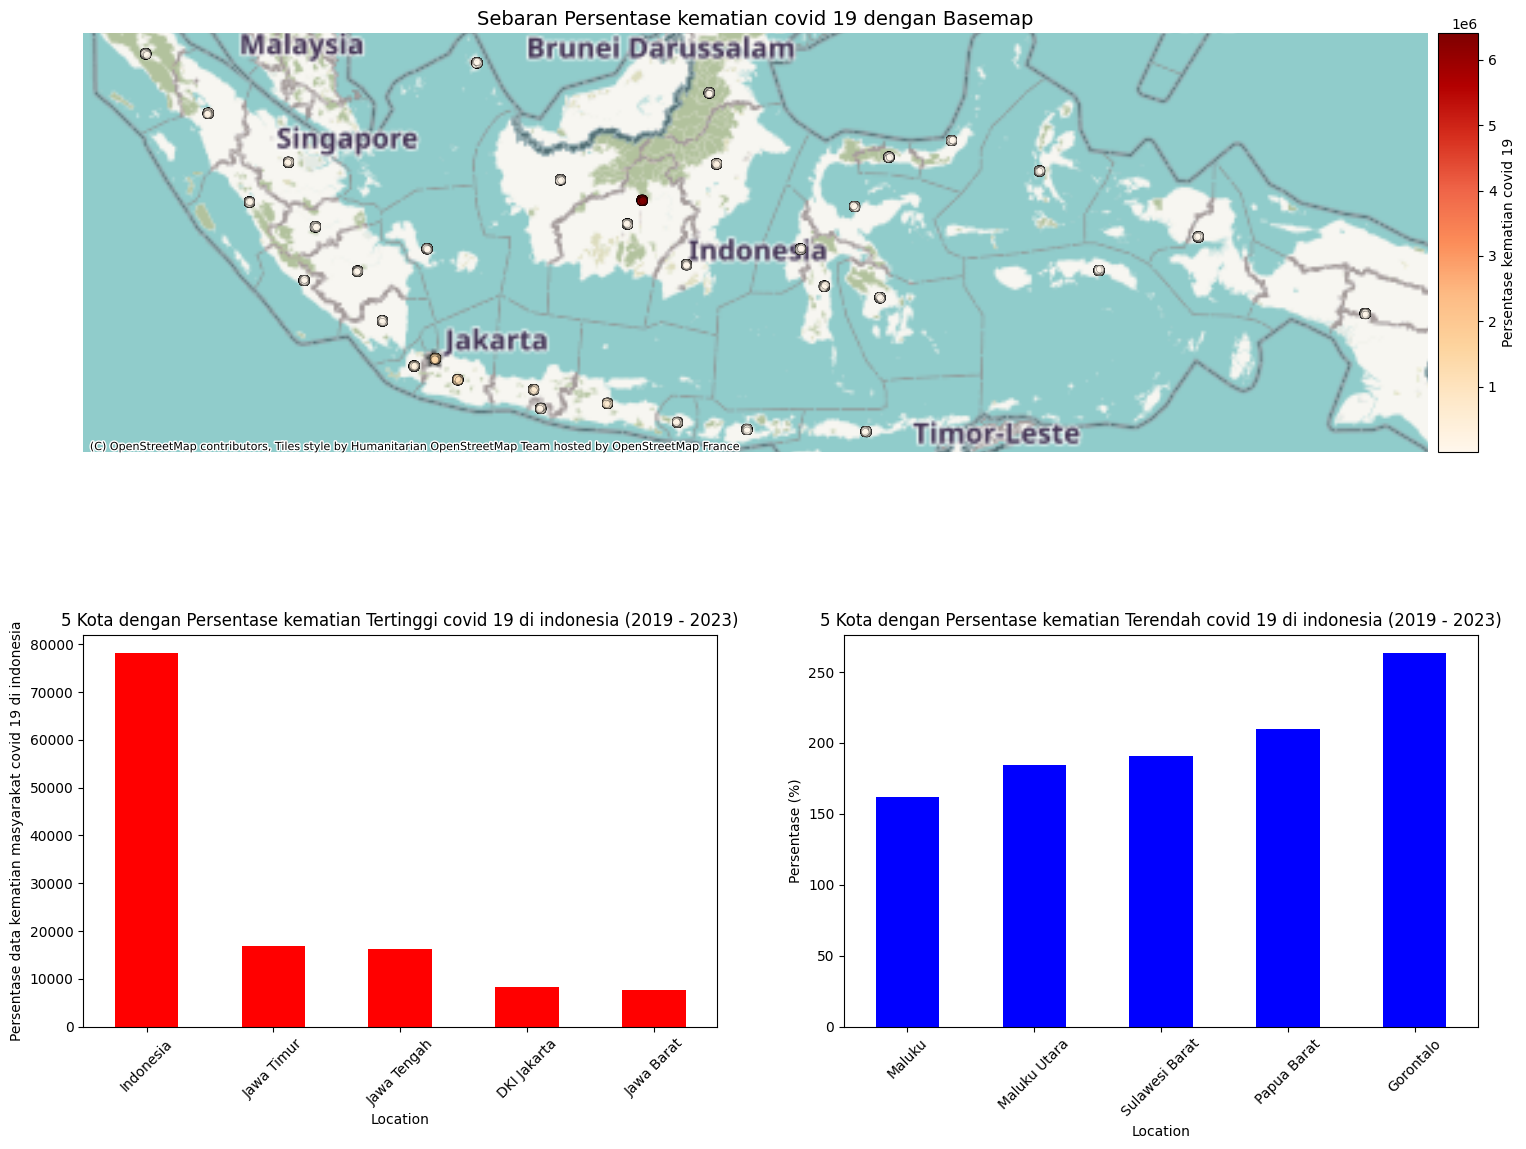

In [9]:
# Buat layout dengan GridSpec
fig = plt.figure(figsize=(18, 14))
gs = gridspec.GridSpec(2, 2, height_ratios=[3, 2])

# --- Row 1: Peta sebaran (colspan=2) ---
ax_map = plt.subplot(gs[0, :])
divider = make_axes_locatable(ax_map)
cax = divider.append_axes("right", size="3%", pad=0.1)

df.plot(
ax=ax_map,
column='Total Cases',
cmap='OrRd',
legend=True,
legend_kwds={'label': "Persentase kematian covid 19", 'orientation': "vertical"},
cax=cax,
markersize=30,
edgecolor='black',
linewidth=0.3,
alpha=0.6
)

ctx.add_basemap(ax_map)
ax_map.set_title("Sebaran Persentase kematian covid 19 dengan Basemap", fontsize=14)
ax_map.axis('off')

# --- Row 2: Bar chart top & bottom (stacked vertically di satu kolom) ---
ax_top = plt.subplot(gs[1, 0])
bars_top = top_5.plot(kind='bar', ax=ax_top, color='red' )
ax_top.set_title("5 Kota dengan Persentase kematian Tertinggi covid 19 di indonesia (2019 - 2023)")
ax_top.set_ylabel("Persentase data kematian masyarakat covid 19 di indonesia")
ax_top.set_xlabel("Location")
ax_top.tick_params(axis='x', rotation=45)


# --- Row 2: Bar chart Bottom 5 ---
ax_bottom = plt.subplot(gs[1, 1])
bottom_5.plot(kind='bar', ax=ax_bottom, color='blue')
ax_bottom.set_title("5 Kota dengan Persentase kematian Terendah covid 19 di indonesia (2019 - 2023)")
ax_bottom.set_ylabel("Persentase (%)")
ax_bottom.tick_params(axis='x', rotation=45)


In [10]:
df.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths',
       'geometry'],
      dtype='object')

In [11]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

In [12]:
df = df_numeric.fillna(0)

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [14]:
dbscan = DBSCAN(eps=2.5, min_samples=10)
labels = dbscan.fit_predict(X)

df['Cluster'] = labels

In [15]:
n_cluster = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("\n===================")
print("HASIL CLUSTERING")
print("===================")
print("Jumlah cluster:", n_cluster)
print("Jumlah noise:", n_noise)
print("\nJumlah data tiap cluster:")
print(df['Cluster'].value_counts())


HASIL CLUSTERING
Jumlah cluster: 7
Jumlah noise: 388

Jumlah data tiap cluster:
Cluster
 2    29798
 0      476
 1      473
-1      388
 4      377
 6      170
 5      132
 3        8
Name: count, dtype: int64


In [16]:
print("\n===================")
print("Pola Setiap Cluster")
print("===================")

for c in sorted(df['Cluster'].unique()):
    if c == -1:
        print("\nCluster -1 (NOISE) → Data outlier")
        continue

    print(f"\nCluster {c} → Pola rata-rata:")
    print(df[df['Cluster'] == c][df_numeric.columns].mean())


Pola Setiap Cluster

Cluster -1 (NOISE) → Data outlier

Cluster 0 → Pola rata-rata:
New Cases                      1.013439e+03
New Deaths                     1.646218e+01
New Recovered                  9.231744e+02
New Active Cases               7.380252e+01
Total Cases                    1.611449e+05
Total Deaths                   2.896330e+03
Total Recovered                1.492531e+05
Total Active Cases             8.995433e+03
City or Regency                0.000000e+00
Total Regencies                1.000000e+00
Total Cities                   5.000000e+00
Total Districts                4.400000e+01
Total Urban Villages           2.670000e+02
Total Rural Villages           0.000000e+00
Area (km2)                     6.640000e+02
Population                     1.084614e+07
Population Density             1.633431e+04
Longitude                      1.068361e+02
Latitude                      -6.204699e+00
New Cases per Million          9.343765e+01
Total Cases per Million        1.48